In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-50-us-tech-companies-2022-2023-dataset/Top 50 US Tech Companies 2022 - 2023.csv


# 1. Import Library and Data acquiazation

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("/kaggle/input/top-50-us-tech-companies-2022-2023-dataset/Top 50 US Tech Companies 2022 - 2023.csv")

In [3]:
df.shape

(50, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Company Name                                      50 non-null     object 
 1   Industry                                          50 non-null     object 
 2   Sector                                            50 non-null     object 
 3   HQ State                                          50 non-null     object 
 4   Founding Year                                     50 non-null     int64  
 5   Annual Revenue 2022-2023 (USD in Billions)        50 non-null     float64
 6   Market Cap (USD in Trillions)                     50 non-null     float64
 7   Stock Name                                        50 non-null     object 
 8   Annual Income Tax in 2022-2023 (USD in Billions)  50 non-null     float64
 9   Employee Size          

In [5]:
df.describe()

,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
count,50.000000,50.00000,50.000000,50.000000,5.000000e+01
mean,1984.140000,51.20440,0.252160,1.386780,8.324962e+04
std,24.988985,97.41288,0.490377,3.687916,2.205869e+05
min,1890.000000,2.06000,0.028000,-3.217000,2.993000e+03
25%,1977.250000,7.65250,0.051250,0.098750,1.415000e+04
50%,1988.500000,17.66500,0.082500,0.280500,2.472500e+04
75%,1999.750000,40.81500,0.160250,0.945000,7.015575e+04
max,2012.000000,513.98000,2.520000,18.314000,1.541000e+06


In [6]:
df.isnull().sum()

Company Name                                        0
Industry                                            0
Sector                                              0
HQ State                                            0
Founding Year                                       0
Annual Revenue 2022-2023 (USD in Billions)          0
Market Cap (USD in Trillions)                       0
Stock Name                                          0
Annual Income Tax in 2022-2023 (USD in Billions)    0
Employee Size                                       0
dtype: int64

In [7]:
df.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473


# 2.  Data preprocessing and Understanding of the data

In [8]:
df.nunique()

Company Name                                        50
Industry                                             1
Sector                                               8
HQ State                                            13
Founding Year                                       36
Annual Revenue 2022-2023 (USD in Billions)          50
Market Cap (USD in Trillions)                       42
Stock Name                                          50
Annual Income Tax in 2022-2023 (USD in Billions)    50
Employee Size                                       48
dtype: int64

In [9]:
# Generate New column name 'Age'
df['Age'] = 2023 - df['Founding Year'] 

In [10]:
# Drop column 'Founding Year' as Age column added in dataframe
df.drop(columns = ['Founding Year'],inplace = True)

In [11]:
# Company having highest Revenue and other Details 
highest_revenue = df.loc[df['Annual Revenue 2022-2023 (USD in Billions)'].idxmax()]
company_name = highest_revenue['Company Name']
print(company_name, highest_revenue)

Amazon Company Name                                                      Amazon
Industry                                                      Technology
Sector                                              Software Application
HQ State                                                      Washington
Annual Revenue 2022-2023 (USD in Billions)                        513.98
Market Cap (USD in Trillions)                                       1.03
Stock Name                                                          AMZN
Annual Income Tax in 2022-2023 (USD in Billions)                  -3.217
Employee Size                                                    1541000
Age                                                                   29
Name: 3, dtype: object


### Highest revenue Company name is "Amazone"

In [12]:
# Company having lowest Revenue and other Details 
lowest_revenue = df.loc[df['Annual Revenue 2022-2023 (USD in Billions)'].idxmin()]
company_name = lowest_revenue['Company Name']
print(company_name, lowest_revenue)

Snowflake Inc. Company Name                                              Snowflake Inc.
Industry                                                      Technology
Sector                                              Software Application
HQ State                                                         Montana
Annual Revenue 2022-2023 (USD in Billions)                          2.06
Market Cap (USD in Trillions)                                      0.046
Stock Name                                                          SNOW
Annual Income Tax in 2022-2023 (USD in Billions)                   0.003
Employee Size                                                       4991
Age                                                                   11
Name: 41, dtype: object


## lowest revenue company is "Snowflake Inc"

In [13]:
df['HQ State'].value_counts()

California        33
Texas              4
Washington         2
New York           2
Connecticut        1
Massachusetts      1
New Jersey         1
Wisconsin          1
Idaho              1
Montana            1
Florida            1
Arizona            1
North Carolina     1
Name: HQ State, dtype: int64

### Hence, California city has maximum Head querters located

In [14]:
# Let's check which  sector companie's fall maximum
df['Sector'].value_counts()

Software Application        15
Semiconductors              14
Software Infrastructure     12
IT Services                  3
Computer Hardware            3
Consumer Electronics         1
Communication Equipments     1
Electronic Components        1
Name: Sector, dtype: int64

### Hence, maximum company's fall into  Sector "Software Application"

In [15]:
# Let's Check which is oldest organisation 
Oldest_organisation = df[['Company Name','Age']].max()
print(Oldest_organisation)

Company Name    Workday Inc.
Age                      133
dtype: object


### Hence, Oldest company name is " Workday Inc and Age is 133 Years"

In [16]:
# Let's check which company has highest employee
max_employee = df[['Company Name','Employee Size']].max()
print('Maximum Employee size is:',max_employee)

Maximum Employee size is: Company Name     Workday Inc.
Employee Size         1541000
dtype: object


### Hence, Workday company has maximum employee 

<AxesSubplot:xlabel='Market Cap (USD in Trillions)', ylabel='Count'>

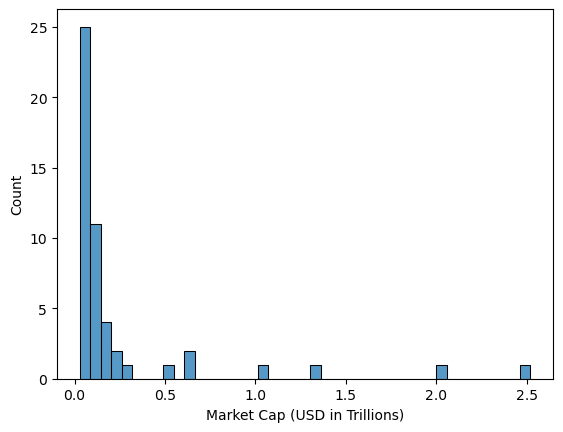

In [17]:
sns.histplot(df['Market Cap (USD in Trillions)'])

### Inference:
###          maximum companies fall in market cap 0.1 to 0.4(USD in Trillions)

<AxesSubplot:>

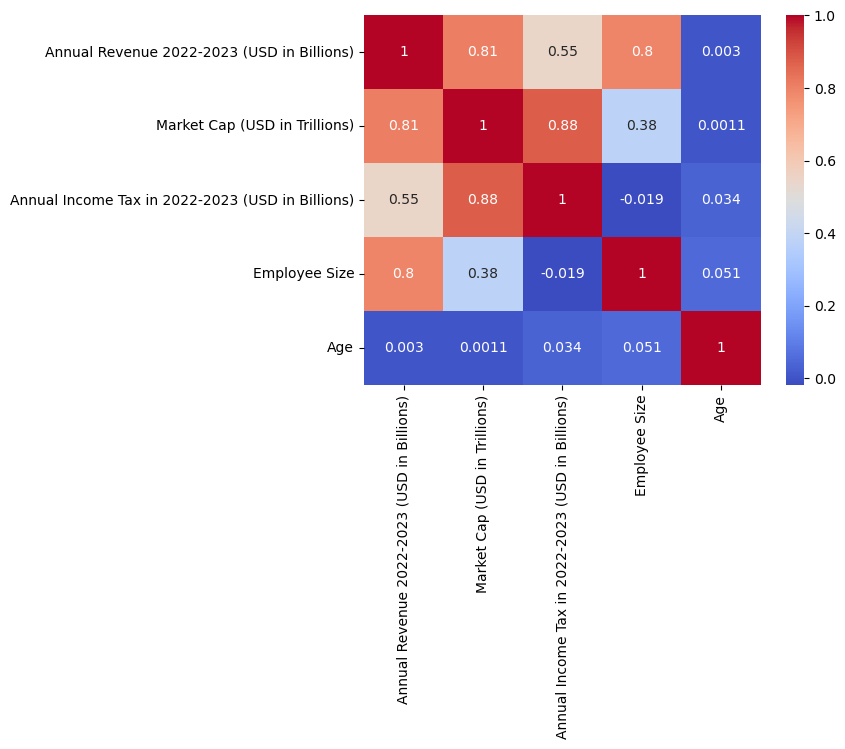

In [18]:
sns.heatmap(data = df.corr(), annot = True, cmap = 'coolwarm')

### Inference
### 1) Annual revenue and market cap strongly co related
### 2) Annual Income tax and annual revenue strongly co related
### 3) Employee size and Annual revenue strongly co related